# Lab 7. Image processing
# Task 7.2 Image Segmentation
## Problem Descriptions
Image segmentation is an application of computer vision that partitions images into discrete instances. In this task, we implement the ResNet model to perform image segmentation on the input picture. The procedure is written as follows.

1. Environment setup:
 * Download the ResNet model and save it to Google Drive.
 * Mount the Google Drive to the Colab notebook.
 * Install 'PixelLib' library, which is used for image segmentation with
   ResNet model.
 * From the library, import the necessary PixelLib classes and functions,
   as well as OpenCV for image handling.

2. Load the pre-trained ResNet Model
 * Create an instance of the model using the instanceSegmentation()
   function.
 * Load the pre-trained model weights (pointrend_resnet50.pkl) to the     created model instance.

3. Perform segmentation
 * Pass the input image path to the model and call the 'segmentImage'
   function on the model.
 * 'segmentImage' function will return 'segmask' (dictionary which
   contains segment detail) and 'output' (segmented image).

4. Display results
 * Apply cv_imshow () function to the 'output', segmented image is
   generated.

##Implementation and Results

In [ ]:
#Mount Google drive to read the files from
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/data/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pixellib
import pixellib
from pixellib.instance import instance_segmentation
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
import torch
import pixellib
from pixellib.torchbackend.instance import instanceSegmentation

model = instanceSegmentation()
model.load_model(path + "pointrend_resnet50.pkl")
#model.segmentImage(path + "segment.jpg", show_bboxes=False, output_image_name="/content/drive/MyDrive/data/image_path_out.jpg")
segmask, output = model.segmentImage(path + "night segment.jpg", show_bboxes=False)
cv2_imshow(output)

Output hidden; open in https://colab.research.google.com to view.

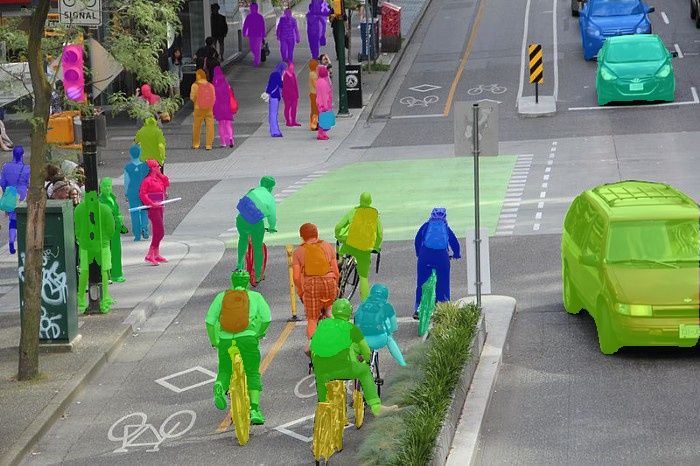

In [ ]:
img = cv2.imread("/content/drive/MyDrive/data/image_path_out.jpg")
cv2_imshow(img)

##Discussion
In this task, we test the performance of image segmentation in easy cases (few people on the street during the daytime) and difficult cases (crowded people on the street during nighttime).

####Easy case
![picture](https://github.com/mengheng02/image-file/blob/main/segmented%20image%201.png?raw=true)

From the segmented image of the easy case, we can observe that most of the people and objects are captured and segmented.

####Difficult case
![picture](https://github.com/mengheng02/image-file/blob/main/segmented%20night.png?raw=true)

From the segmented image, we can observe that the ResNet model has captured and partitioned some people but there are still a lot of people not being segmented. It might be due to low lighting conditions and overcrowded people, resulting in many overlapping instances and making image segmentation more difficult.

As a conclusion, the ResNet model can perform well in segmenting pictures with good lighting conditions and uncrowded scenes. There is improvement space for this model especially in segmenting images with low lighting conditions or crowded scenes.